<a href="https://colab.research.google.com/github/vkumar61/MAT421/blob/main/Module_B_Section_17_1_17_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Interpolation

Interpolation is a crucial tool in mathematics. When dealing with highly reliable data, you can sometimes bypass the process of designing a robust model and simply "connect-the-dots" to make reasonably accurate inferences between datapoints.

The task of interpolation becomes particularly interesting when exploring various methods of connecting data points. One standout method involves connecting points that are right next to each other with a straight line, known as linear interpolation. Another common approach is cubic spline interpolation, where points are joined using a piecewise cubic polynomial. This technique creates a smooth curve passing through given data points, ensuring continuity, smoothness, and often providing a more accurate representation of the underlying data.

This accuracy is especially notable in physics modeling, where information about the first derivative (velocity) and second derivative (acceleration) is known. For the following examples, we will consider simple 2D data (input, output). However, it's important to note that interpolation methods can be applied in any dimension, with adjustments made for the number of constraints.

Now we demonstrate both linear and cubic interpolation.


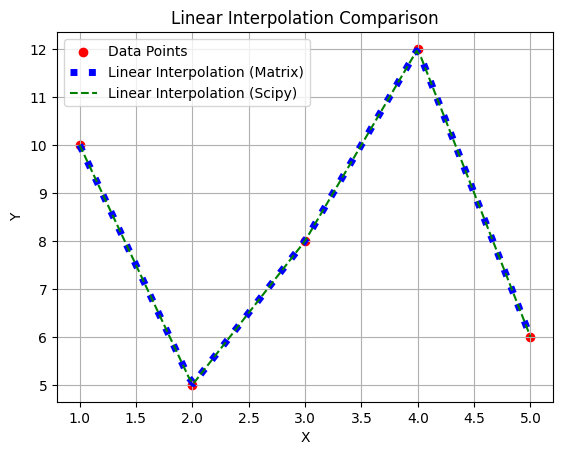

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Data points
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([10, 5, 8, 12, 6])

# Linear interpolation using a matrix
def linear_interpolation_matrix(x, y, x_interp):
    n = len(x)
    m_values = np.zeros(n - 1)
    b_values = np.zeros(n - 1)

    # Learn m and b for each pair of points
    for i in range(n - 1):
        m_values[i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])
        b_values[i] = y[i] - m_values[i] * x[i]

    # Evaluate x_interp values
    y_interp = np.piecewise(x_interp, [((x_interp >= x[i]) & (x_interp <= x[i + 1])) for i in range(n - 1)], [lambda x, i=i: m_values[i] * x + b_values[i] for i in range(n - 1)])

    return y_interp

# Scipy linear interpolation
linear_interp_function = interp1d(x_data, y_data, kind='linear')

# Generate points for interpolation
x_interp = np.linspace(min(x_data), max(x_data), 100)

# Perform linear interpolation using both methods
y_interp_matrix = linear_interpolation_matrix(x_data, y_data, x_interp)
y_interp_scipy = linear_interp_function(x_interp)

# Plotting
plt.scatter(x_data, y_data, label='Data Points', color='red')
plt.plot(x_interp, y_interp_matrix, label='Linear Interpolation ("By-hand")', linestyle=':', color='blue', linewidth=5)
plt.plot(x_interp, y_interp_scipy, label='Linear Interpolation (Scipy)', linestyle='--', color='green')

plt.title('Linear Interpolation Comparison')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Since splie is slightly more complicated I thought it would be best to restate the conditions, and elaborate more: The cubic spline interpolation involves constructing a piecewise cubic polynomial, called a spline, that passes through each data point and has continuous first and second derivatives. The goal is to create a smooth curve that accurately represents the underlying data.

### Constraints

To determine the coefficients of the cubic spline, several constraints are imposed:

1. **Interpolation Conditions:**
   - Each cubic function must intersect the data points on the left and right:
     $S_i(x_i) = S_i(x_{i+1}) = y_i, \quad i = 1, \ldots, n-1.$
     $S_{i+1}(x_{i+1}) = y_{i+1}, \quad i = 1, \ldots, n-1.$
   This results in $2(n-1)$ equations.

2. **Continuity Conditions:**
   - Cubic splines should have continuous first and second derivatives at the data points:
     $S_i'(x_{i+1}) = S_{i+1}'(x_{i+1}), \quad i = 1, \ldots, n-2.$
     $S_i''(x_{i+1}) = S_{i+1}''(x_{i+1}), \quad i = 1, \ldots, n-2.$
   This provides $2(n-2)$ equations.

3. **Additional Constraints:**
   - Two more equations are needed to compute the coefficients of $S_i(x)$. These constraints are arbitrary and can be chosen based on the interpolation requirements.
   - Commonly used constraints involve assuming that the second derivatives are zero at the endpoints:
     $S_1''(x_1) = S_{n-1}''(x_n) = 0.$

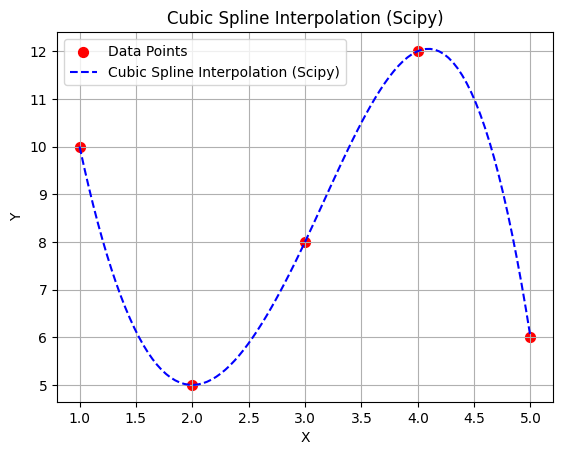

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Data points
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([10, 5, 8, 12, 6])

# Create a cubic spline interpolation
cubic_spline = CubicSpline(x_data, y_data)

# Generate points for interpolation
x_interp = np.linspace(min(x_data), max(x_data), 100)

# Evaluate the cubic spline at the interpolation points
y_interp_scipy = cubic_spline(x_interp)

# Plotting
plt.scatter(x_data, y_data, label='Data Points', color='red', s=50)
plt.plot(x_interp, y_interp_scipy, label='Cubic Spline Interpolation (Scipy)', linestyle='--', color='blue')

plt.title('Cubic Spline Interpolation (Scipy)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()